## Machine Learning TP1 : Reconnaissance de Champignon

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [40]:
df = pd.read_csv('champignons.csv', dtype={'id Champignon': int})
print(df)

print("\nNombre de champignons toxiques ou non-toxiques :")

print("\nVérification des valeurs nulles :")
print(df.isnull().sum())

        toxicite surface-chapeau ecchymoses attache-lamelles taille-lamelles  \
0        toxique           lisse        oui            libre          étroit   
1     comestible           lisse        oui            libre           large   
2     comestible           lisse        oui            libre           large   
3        toxique        écaillée        oui            libre          étroit   
4     comestible           lisse        non            libre           large   
...          ...             ...        ...              ...             ...   
8119  comestible           lisse        non         adhérent           large   
8120  comestible           lisse        non         adhérent           large   
8121  comestible           lisse        non         adhérent           large   
8122     toxique        écaillée        non            libre          étroit   
8123  comestible           lisse        non         adhérent           large   

       forme-pied surface-pied-sur-anne

1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [43]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('champignons.csv', dtype={'id Champignon': int})
encoded_data = OneHotEncoder(sparse_output=False).fit_transform(df.select_dtypes(include=['object']))
encoded_df = pd.DataFrame(encoded_data, columns=OneHotEncoder(sparse_output=False).fit(df.select_dtypes(include=['object'])).get_feature_names_out())
print(f"Taille : {encoded_df.shape}, Colonnes : {encoded_df.columns.tolist()}")

Taille : (8124, 42), Colonnes : ['toxicite_comestible', 'toxicite_toxique', 'surface-chapeau_fibreuse', 'surface-chapeau_lisse', 'surface-chapeau_rainurée', 'surface-chapeau_écaillée', 'ecchymoses_non', 'ecchymoses_oui', 'attache-lamelles_adhérent', 'attache-lamelles_libre', 'taille-lamelles_large', 'taille-lamelles_étroit', 'forme-pied_effilé', 'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse', 'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse', 'surface-pied-sur-anneau_écaillée', 'couleur-pied-sur-anneau_beige', 'couleur-pied-sur-anneau_blanc', 'couleur-pied-sur-anneau_brun', 'couleur-pied-sur-anneau_cannelle', 'couleur-pied-sur-anneau_gris', 'couleur-pied-sur-anneau_jaune', 'couleur-pied-sur-anneau_orange', 'couleur-pied-sur-anneau_rose', 'couleur-pied-sur-anneau_rouge', 'couleur-voile_blanc', 'couleur-voile_brun', 'couleur-voile_jaune', 'couleur-voile_orange', 'type-anneau_aucun', 'type-anneau_fibreux', 'type-anneau_large', 'type-anneau_pendant', 'type-an

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [44]:
df = pd.read_csv('champignons.csv', dtype={'id Champignon': int})
encoded_data = OneHotEncoder(sparse_output=False).fit_transform(df.select_dtypes(include=['object']))
encoded_df = pd.DataFrame(encoded_data, columns=OneHotEncoder(sparse_output=False).fit(df.select_dtypes(include=['object'])).get_feature_names_out())
encoded_df = encoded_df.sample(frac=1).reset_index(drop=True)
print(encoded_df.head())

   toxicite_comestible  toxicite_toxique  surface-chapeau_fibreuse  \
0                  0.0               1.0                       0.0   
1                  1.0               0.0                       0.0   
2                  0.0               1.0                       0.0   
3                  1.0               0.0                       0.0   
4                  0.0               1.0                       0.0   

   surface-chapeau_lisse  surface-chapeau_rainurée  surface-chapeau_écaillée  \
0                    1.0                       0.0                       0.0   
1                    0.0                       0.0                       1.0   
2                    1.0                       0.0                       0.0   
3                    0.0                       0.0                       1.0   
4                    1.0                       0.0                       0.0   

   ecchymoses_non  ecchymoses_oui  attache-lamelles_adhérent  \
0             1.0             0.0 

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [46]:
J'ai pas compris


KeyError: "['toxicite_toxique', 'toxicite_comestible'] not found in axis"

## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

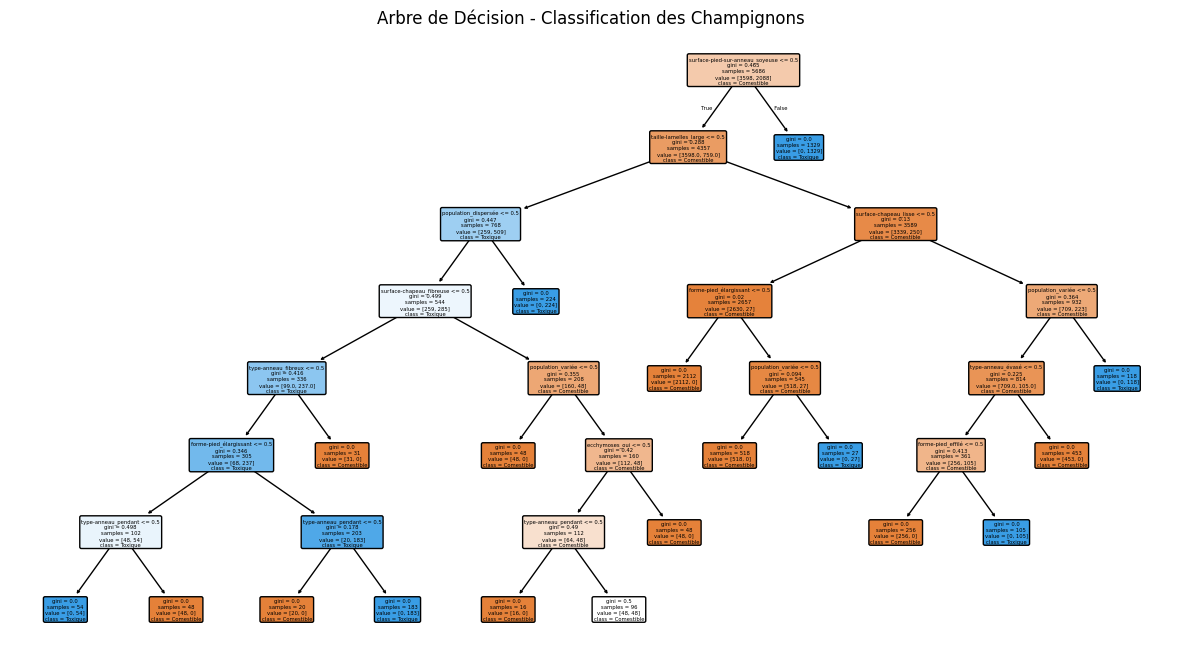

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

arbre = DecisionTreeClassifier()

arbre.fit(train_features, train_labels)


plt.figure(figsize=(15, 8))
plot_tree(arbre, filled=True, feature_names=train_features.columns, class_names=['Comestible', 'Toxique'], rounded=True)
plt.title("Arbre de Décision - Classification des Champignons")
plt.show()


2.2 Afficher l'arbre obtenu en utilisant graphwiz

In [58]:
!pip install graphviz

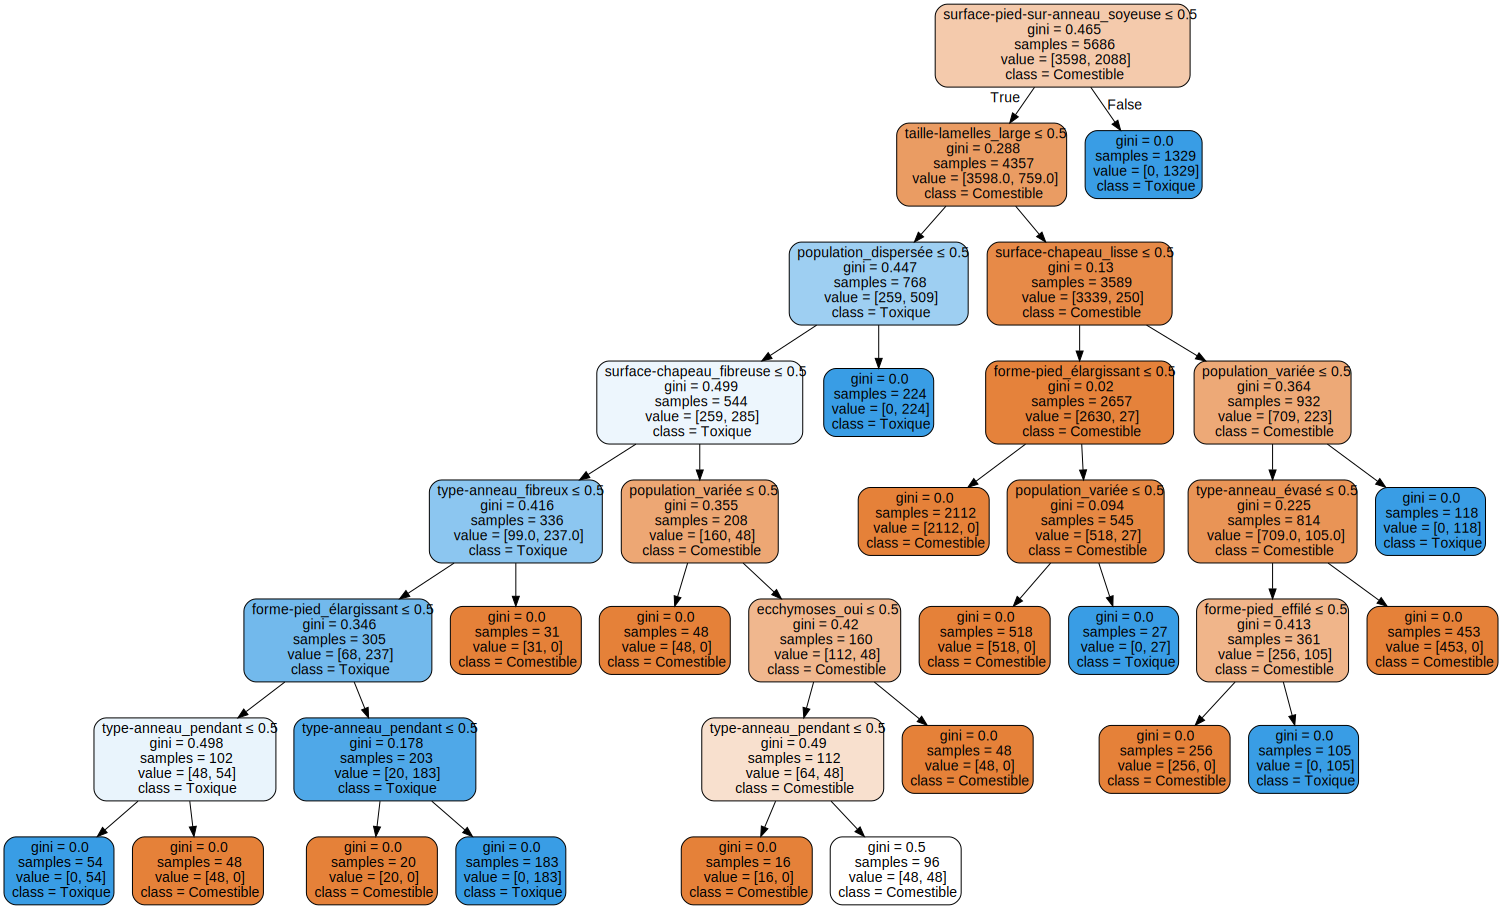

In [59]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(arbre, out_file=None,
                           feature_names=train_features.columns,
                           class_names=['Comestible', 'Toxique'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("arbre_decision", view=True)
graph


2.3 Mesurer la précision du modèle sur les données de dev

In [60]:
from sklearn.metrics import accuracy_score

dev_predictions = arbre.predict(dev_features)

precision = accuracy_score(dev_labels, dev_predictions)

print(f"Précision du modèle sur les données de dev : {precision:.4f}")


Précision du modèle sur les données de dev : 0.8917


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)

random_forest.fit(train_features, train_labels)

dev_predictions_rf = random_forest.predict(dev_features)

from sklearn.metrics import accuracy_score
precision_rf = accuracy_score(dev_labels, dev_predictions_rf)

print(f"Précision du modèle Random Forest sur les données de dev : {precision_rf:.4f}")


Précision du modèle Random Forest sur les données de dev : 0.8880


3.2 Afficher trois arbres au hasard.

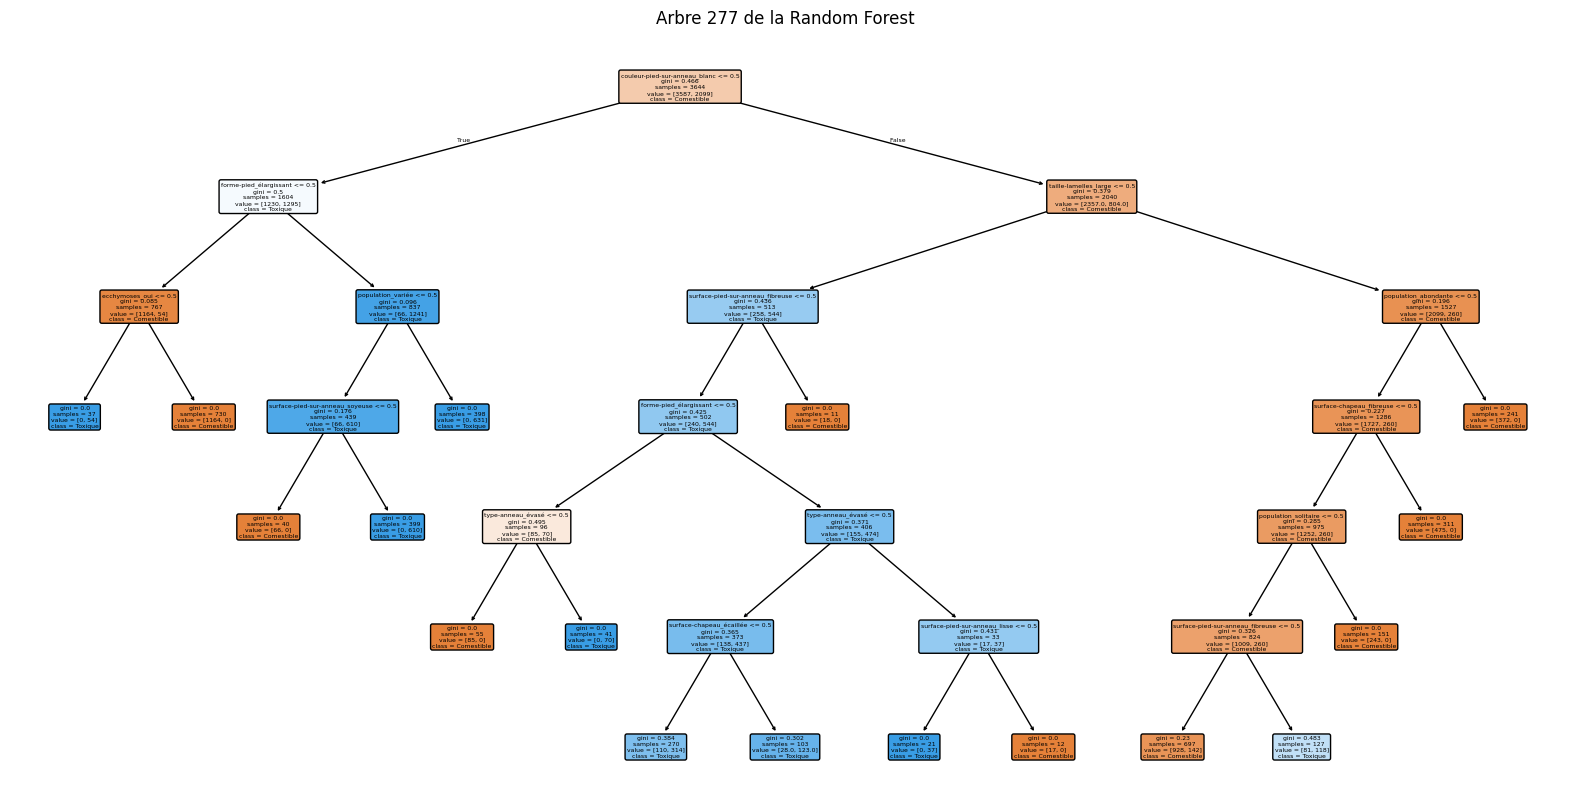

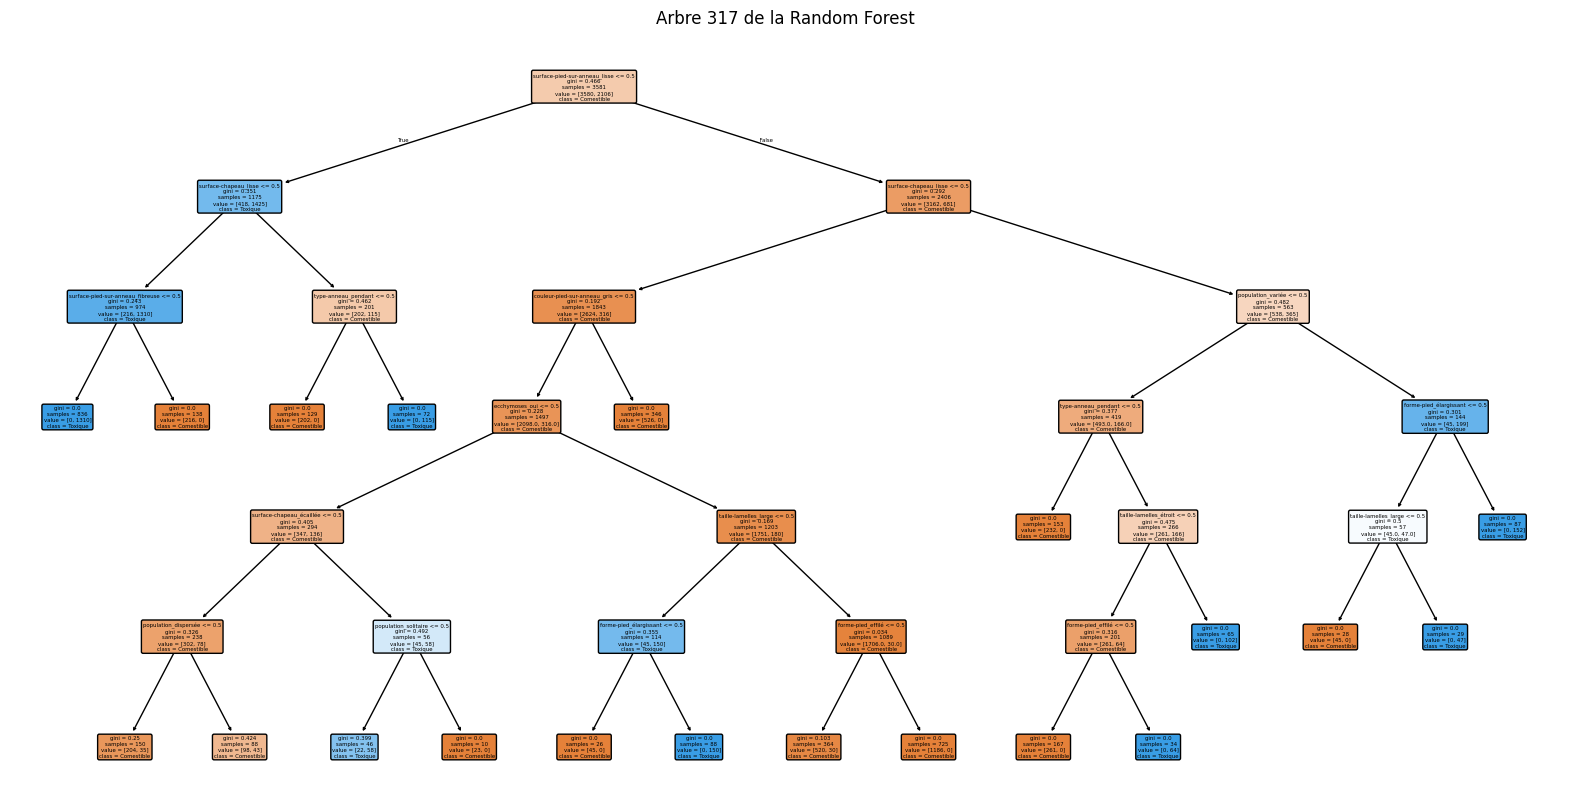

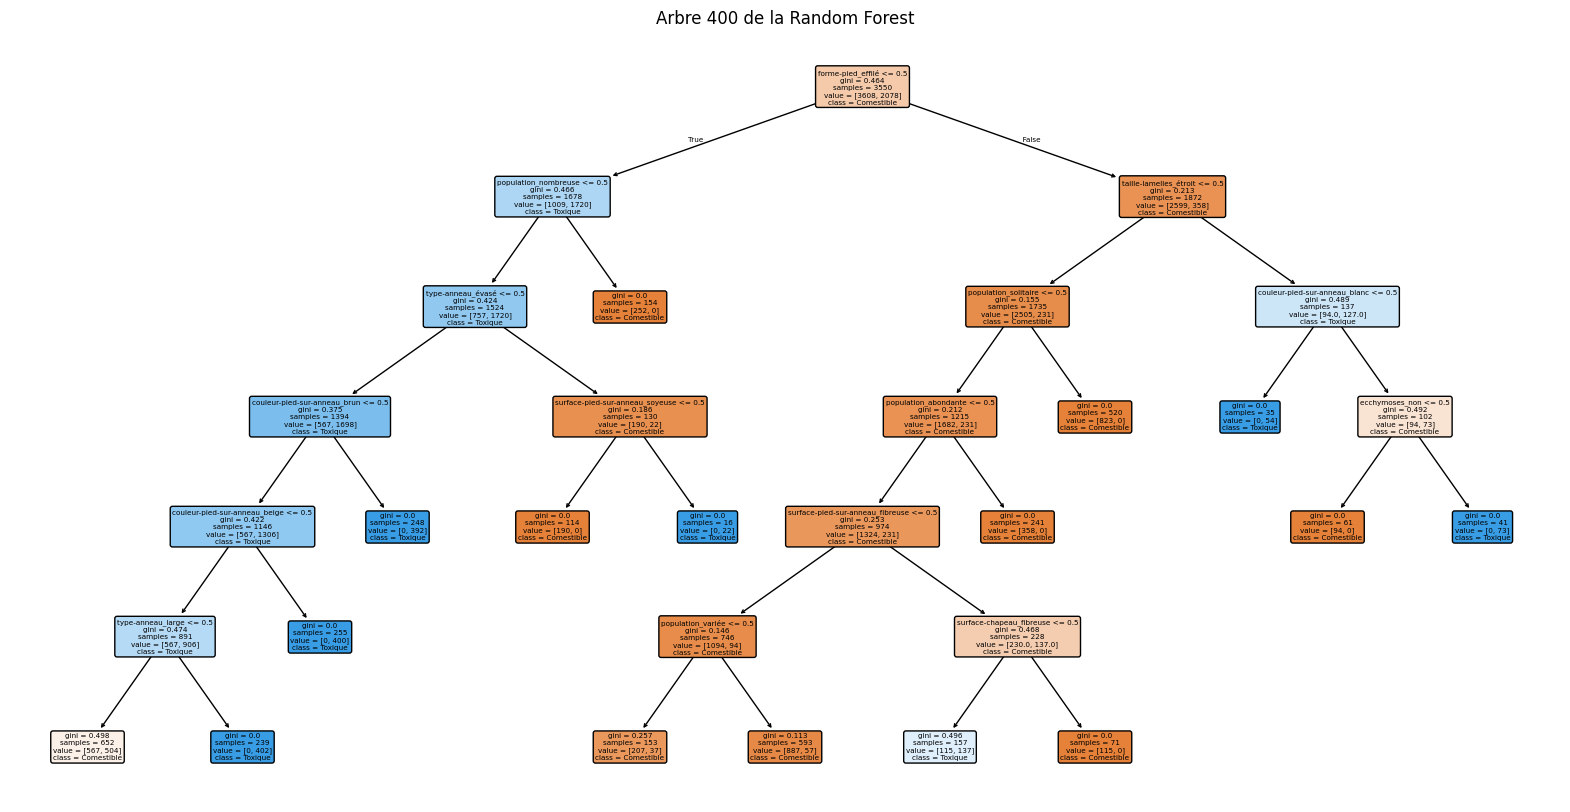

In [62]:
from random import randint
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for _ in range(3):
    arbre_au_hasard = randint(0, len(random_forest.estimators_) - 1)
    plt.figure(figsize=(20, 10))
    plot_tree(random_forest.estimators_[arbre_au_hasard],
              filled=True,
              feature_names=train_features.columns,
              class_names=['Comestible', 'Toxique'],
              rounded=True)
    plt.title(f"Arbre {arbre_au_hasard + 1} de la Random Forest")
    plt.show()


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [63]:
# Mesurer la précision du modèle Random Forest sur les données de dev
precision_dev = random_forest.score(dev_features, dev_labels)

print(f"Précision du modèle Random Forest sur les données de dev : {precision_dev:.4f}")


Précision du modèle Random Forest sur les données de dev : 0.8880


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10, None]
}

rf = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_features, train_labels)


print(f"Meilleurs paramètres : {grid_search.best_params_}")


print(f"Meilleure précision : {grid_search.best_score_:.4f}")


best_rf = grid_search.best_estimator_

precision_dev_best = best_rf.score(dev_features, dev_labels)
print(f"Précision du modèle Random Forest avec les meilleurs paramètres sur les données de dev : {precision_dev_best:.4f}")


Meilleurs paramètres : {'max_depth': None, 'n_estimators': 100}
Meilleure précision : 0.9791
Précision du modèle Random Forest avec les meilleurs paramètres sur les données de dev : 0.8884


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [68]:
print("Meilleurs paramètres :", grid_search.best_params_);
print(f"Précision sur dev : {accuracy_score(dev_labels, grid_search.best_estimator_.predict(dev_features)):.4f}")


Meilleurs paramètres : {'max_depth': None, 'n_estimators': 100}
Précision sur dev : 0.8884


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]

print(important_features)


             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


## 5. Stacking

Essayer différents modèles d'estimateur final

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=10000)
}

param_grid = {
    "Random Forest": {"n_estimators": [50, 100], "max_depth": [10, 20]},
    "Gradient Boosting": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]},
    "SVM": {"C": [0.1, 1], "kernel": ["linear", "rbf"]},
    "Logistic Regression": {"C": [0.1, 1], "solver": ["liblinear"]}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Best Parameters: {grid_search.best_params_} - Accuracy: {accuracy:.4f}")



Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 50} - Accuracy: 1.0000
Gradient Boosting - Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50} - Accuracy: 1.0000
SVM - Best Parameters: {'C': 1, 'kernel': 'linear'} - Accuracy: 1.0000
Logistic Regression - Best Parameters: {'C': 1, 'solver': 'liblinear'} - Accuracy: 1.0000


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les execices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?